## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

#### Now you are ready to start!

## Aggregating Data Using ArcGIS Notebooks

In this notebook, I will aggregate point features by Pasadena block groups and by hexagons.

<Item title:"Traffic Collisions" type:Feature Layer Collection owner:Learn_ArcGIS>
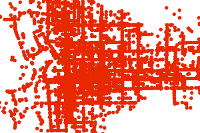

In [3]:
# Item Added From Toolbar
# Title: Traffic Collisions | Type: Feature Service | Owner: Learn_ArcGIS
traffic = gis.content.get("79d3e458dcaf486f81c5591a67538179")
traffic

<Item title:"Pasadena Block Groups" type:Feature Layer Collection owner:Learn_ArcGIS>
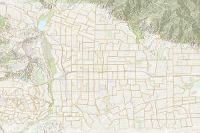

In [4]:
# Item Added From Toolbar
# Title: Pasadena Block Groups | Type: Feature Service | Owner: Learn_ArcGIS
block_groups = gis.content.get("af363700f8f84c11a02f084e78a296aa")
block_groups

In [5]:
traffic_map = gis.map('Pasadena, CA')


In [6]:
traffic_map

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
traffic_map.add_layer(block_groups)

In [8]:
traffic_map.add_layer(traffic)

In [9]:
from arcgis import features
features.summarize_data.aggregate_points?

In [11]:
from arcgis import features
collisions_by_block_group = features.summarize_data.aggregate_points(point_layer = traffic, polygon_layer= block_groups, output_name = "collisions_by_block_group_SJS", keep_boundaries_with_no_points=False)

{"cost": 19.65}


In [12]:
collisions_by_block_group

<Item title:"collisions_by_block_group_SJS" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>

In [13]:
traffic_map_1 = gis.map('Pasadena, CA')
traffic_map_1

MapView(layout=Layout(height='400px', width='100%'))

In [14]:
traffic_map_1.add_layer(collisions_by_block_group)

In [15]:
from arcgis import features
features.manage_data.generate_tessellation?

In [16]:
hexbins = features.manage_data.generate_tessellation(extent_layer=block_groups, bin_size=1, bin_size_unit='SquareKilometers', bin_type='HEXAGON', output_name='Pasadena_CA_Hexbins_SJS')

{"cost": 0.748}


In [17]:
hexbins

<Item title:"Pasadena_CA_Hexbins_SJS" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>

In [18]:
from arcgis import features
collisions_by_hexbin = features.summarize_data.aggregate_points(point_layer=traffic, output_name='collisions_by_1km_hexbin_SJS', polygon_layer=hexbins, keep_boundaries_with_no_points=True)

{"cost": 20.123}


In [19]:
collisions_by_hexbin

<Item title:"collisions_by_1km_hexbin_SJS" type:Feature Layer Collection owner:sshahid3@slu.edu_SLUSTL>

In [20]:
traffic_map_2 = gis.map('Pasadena, CA')
traffic_map_2

MapView(layout=Layout(height='400px', width='100%'))

In [21]:
traffic_map_2.add_layer(collisions_by_hexbin)